In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout,Dense, Flatten,Conv2D,MaxPool2D
from tensorflow.keras.applications import EfficientNetV2B3

In [2]:
np.random.seed(123)
tf.random.set_seed(123)

In [3]:
train_data_path = "/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/Neural Networks/Convolutional Neural Networks/intel image dataset/seg_train/seg_train"
test_data_path = "/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/Neural Networks/Convolutional Neural Networks/intel image dataset/seg_test/seg_test"
pred_data_gen = "/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/Neural Networks/Convolutional Neural Networks/intel image dataset/seg_pred"

In [25]:
datagan = ImageDataGenerator(rescale=1/255)

In [26]:
batch_size_ = 100

In [27]:
train_datagan = datagan.flow_from_directory(train_data_path,target_size = (150,150),batch_size = batch_size_)
test_datagan = datagan.flow_from_directory(test_data_path,target_size = (150,150),batch_size = batch_size_)
pred_datagen = datagan.flow_from_directory(pred_data_gen,target_size = (150,150),batch_size = batch_size_)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


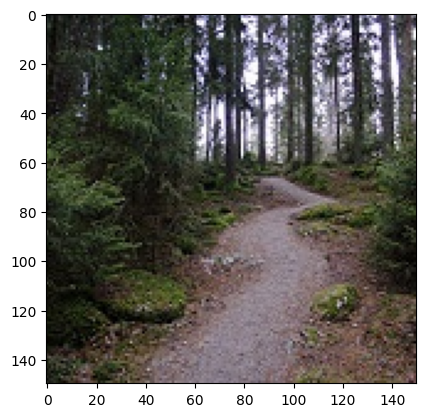

In [28]:
batch_1 = train_datagan.next()
plt.imshow(batch_1[0][12])

In [29]:
class_name = train_datagan.class_indices
class_name

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

# model

In [30]:
reg = tf.keras.regularizers.l2(0.001)

In [11]:
#  model architecture
model = keras.Sequential()
model.add(Conv2D(activation= "relu",filters = 16,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",input_shape = (150,150,3),name = "conv1"))
model.add(Dropout(0.25,name = "drop_1"))
model.add(Conv2D(activation= "relu",filters = 16,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv2"))
model.add(Dropout(0.25,name = "drop_2"))
model.add(MaxPool2D())
model.add(Conv2D(activation= "relu",filters = 32,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv3"))
model.add(Dropout(0.25,name = "drop_3"))
model.add(Conv2D(activation= "relu",filters = 32,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv4"))
model.add(Dropout(0.25,name = "drop_4"))
model.add(MaxPool2D())
model.add(Conv2D(activation= "relu",filters = 64,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv5"))
model.add(Dropout(0.25,name = "drop_5"))
model.add(Conv2D(activation= "relu",filters = 64,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv6"))
model.add(Dropout(0.25,name = "drop_6"))


model.add(Flatten(name = "flatten"))

model.add(Dense(units=128,activation="relu" , name ='hidden1',kernel_regularizer=reg))
model.add(Dropout(0.5 , name = "drop_7"))
model.add(Dense(units=6,activation="softmax" , name = "out_lay",kernel_regularizer=reg))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 150, 150, 16)      448       
                                                                 
 drop_1 (Dropout)            (None, 150, 150, 16)      0         
                                                                 
 conv2 (Conv2D)              (None, 150, 150, 16)      2320      
                                                                 
 drop_2 (Dropout)            (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv3 (Conv2D)              (None, 75, 75, 32)        4640      
                                                        

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [14]:
model.load_weights("/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/Neural Networks/Convolutional Neural Networks/intel image dataset/weighys_itel_image.h5")

In [15]:
# compile model
model.compile(loss= tf.losses.CategoricalCrossentropy(),
              optimizer = tf.optimizers.Adam(learning_rate=0.0001),
             metrics=tf.metrics.CategoricalAccuracy())

In [ ]:
model.predict(pred_datagen)

74/74 [==============================] - 24s 224ms/step


array([[5.01089205e-04, 6.81480276e-04, 3.26165766e-01, 2.28059575e-01,
        4.41534817e-01, 3.05732549e-03],
       [8.10462865e-04, 1.23591265e-02, 1.17909335e-01, 8.66062462e-01,
        2.76972540e-03, 8.88600625e-05],
       [7.06480118e-03, 1.17712596e-03, 5.10201156e-01, 2.70501822e-01,
        2.03520656e-01, 7.53439730e-03],
       ...,
       [1.16384646e-04, 5.65039809e-05, 5.66611230e-01, 4.10129905e-01,
        2.30539385e-02, 3.19864630e-05],
       [6.36141896e-02, 8.83221865e-01, 1.60075240e-02, 4.80966549e-03,
        8.80574249e-03, 2.35410612e-02],
       [1.41559460e-03, 4.23343712e-03, 8.78529772e-02, 8.84002745e-01,
        2.22780444e-02, 2.17226159e-04]], dtype=float32)

In [ ]:
model_hist = model.fit(train_datagan,epochs=30,batch_size = batch_size_,
                       validation_data = test_datagan,verbose = 2)

Epoch 1/30
141/141 - 41s - loss: 0.6108 - categorical_accuracy: 0.8541 - val_loss: 0.7129 - val_categorical_accuracy: 0.8290 - 41s/epoch - 292ms/step
Epoch 2/30
141/141 - 41s - loss: 0.6140 - categorical_accuracy: 0.8523 - val_loss: 0.7427 - val_categorical_accuracy: 0.8230 - 41s/epoch - 288ms/step
Epoch 3/30
141/141 - 44s - loss: 0.6249 - categorical_accuracy: 0.8540 - val_loss: 0.7246 - val_categorical_accuracy: 0.8300 - 44s/epoch - 310ms/step
Epoch 4/30
141/141 - 41s - loss: 0.6170 - categorical_accuracy: 0.8551 - val_loss: 0.9311 - val_categorical_accuracy: 0.7320 - 41s/epoch - 291ms/step
Epoch 5/30
141/141 - 43s - loss: 0.6154 - categorical_accuracy: 0.8541 - val_loss: 0.7734 - val_categorical_accuracy: 0.8127 - 43s/epoch - 305ms/step
Epoch 6/30
141/141 - 42s - loss: 0.6222 - categorical_accuracy: 0.8577 - val_loss: 0.8245 - val_categorical_accuracy: 0.7937 - 42s/epoch - 296ms/step
Epoch 7/30
141/141 - 43s - loss: 0.6260 - categorical_accuracy: 0.8516 - val_loss: 0.7652 - val_cate

<ipython-input-18-63ac202c402d>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_categorical_accuracy,'r--', color = "blue")
<ipython-input-18-63ac202c402d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(categorical_accuracy,'--bo',color = "red")


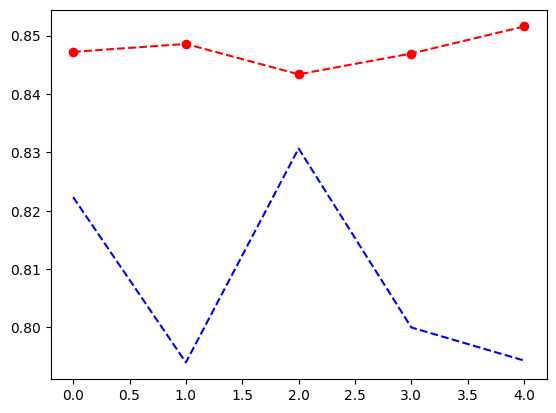

In [ ]:
val_categorical_accuracy = model_hist.history["val_categorical_accuracy"]
categorical_accuracy = model_hist.history["categorical_accuracy"]
plt.plot(val_categorical_accuracy,'r--', color = "blue")
plt.plot(categorical_accuracy,'--bo',color = "red")
plt.show()

# model_pretrain

In [4]:
datagan_pretrain = ImageDataGenerator()

In [5]:
batch_size_pretrain = 100

In [6]:
train_datagan_pretrain = datagan_pretrain.flow_from_directory(train_data_path,target_size = (150,150),batch_size = batch_size_pretrain)
test_datagan_pretrain = datagan_pretrain.flow_from_directory(test_data_path,target_size = (150,150),batch_size = batch_size_pretrain)
pred_datagen_pretrain = datagan_pretrain.flow_from_directory(pred_data_gen,target_size = (150,150),batch_size = batch_size_pretrain)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [7]:
model_EffV2B3 = EfficientNetV2B3(include_top=False,weights="imagenet",input_shape=(150,150,3))

In [ ]:
model_EffV2B3.summary()

In [9]:
model_EffV2B3.trainable = False

In [10]:
model_pretrain = keras.Sequential(name = "pretrain")
model_pretrain.add(model_EffV2B3)
model_pretrain.add(Flatten(name = "flatten"))
model_pretrain.add(Dense(128,activation = "relu",name= "fc1"))
model_pretrain.add(Dropout(0.25,name = "drop"))
model_pretrain.add(Dense(6,activation = "softmax",name= "outlayer"))

In [11]:
model_pretrain.summary()

Model: "pretrain"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b3 (Functio  (None, 5, 5, 1536)        12930622  
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 fc1 (Dense)                 (None, 128)               4915328   
                                                                 
 drop (Dropout)              (None, 128)               0         
                                                                 
 outlayer (Dense)            (None, 6)                 774       
                                                                 
Total params: 17846724 (68.08 MB)
Trainable params: 4916102 (18.75 MB)
Non-trainable params: 12930622 (49.33 MB)
___________

In [12]:
# compile model
model_pretrain.compile(loss= tf.losses.CategoricalCrossentropy(),
              optimizer = tf.optimizers.Adam(learning_rate=0.001),
             metrics=tf.metrics.CategoricalAccuracy())

In [13]:
model_hist_pretrain = model_pretrain.fit(train_datagan_pretrain,epochs=10,batch_size = batch_size_pretrain,
                       validation_data = test_datagan_pretrain,verbose = 2)

Epoch 1/10
141/141 - 4994s - loss: 0.4055 - categorical_accuracy: 0.8838 - val_loss: 0.2362 - val_categorical_accuracy: 0.9180 - 4994s/epoch - 35s/step
Epoch 2/10
141/141 - 39s - loss: 0.2015 - categorical_accuracy: 0.9277 - val_loss: 0.2159 - val_categorical_accuracy: 0.9213 - 39s/epoch - 280ms/step
Epoch 3/10
141/141 - 41s - loss: 0.1599 - categorical_accuracy: 0.9436 - val_loss: 0.2295 - val_categorical_accuracy: 0.9237 - 41s/epoch - 290ms/step
Epoch 4/10
141/141 - 38s - loss: 0.1210 - categorical_accuracy: 0.9567 - val_loss: 0.2476 - val_categorical_accuracy: 0.9243 - 38s/epoch - 268ms/step
Epoch 5/10
141/141 - 38s - loss: 0.1057 - categorical_accuracy: 0.9622 - val_loss: 0.2570 - val_categorical_accuracy: 0.9213 - 38s/epoch - 270ms/step
Epoch 6/10
141/141 - 41s - loss: 0.0901 - categorical_accuracy: 0.9674 - val_loss: 0.2686 - val_categorical_accuracy: 0.9247 - 41s/epoch - 292ms/step
Epoch 7/10
141/141 - 38s - loss: 0.0864 - categorical_accuracy: 0.9689 - val_loss: 0.2793 - val_ca